# Zomato Restaurant Project

In [9]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [32]:
#Import necessary Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [33]:
# Load datasets
zomato_df = pd.read_csv('zomato.csv', encoding='ISO-8859-1')
country_code_df = pd.read_excel('Country-Code.xlsx')

In [34]:
# Merge datasets based on 'Country Code'
df = pd.merge(zomato_df, country_code_df, on='Country Code', how='left')

In [35]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 9551
No of Columns: 22


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [36]:
#Let's see the column Name
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

<b>Observation:- </b>

1. As we can see our dataset having 9551 rows and 22 columns in our dataset. 

2. There are 14 object columns and 5 int64 columns and 3 float columns in the dataset. 

3. Our Targated variable column is Average cost for two,  and Price Range. 

### Data Integrity Check

In [38]:
# check the duplicate values
df.duplicated().sum()

0

##### Let's check any whitespaces or NA or '-' is present in dataset or not

In [39]:
df.isin([' ','NA','-','?']).sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

<b>Comment:- </b>

1. There are no duplicate values are prent in the dataset

2. And there are no special character present in the dataset

In [40]:
#Check the null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In cuisines column there are 9 null values and other columns are not having null values .

so now first we need to fix null values .

In [41]:
df['Cuisines'].value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [42]:
# Get the indices of rows with missing values in 'column_name'
missing_indices = df[df['Cuisines'].isnull()].index

# Use iloc to display rows with missing values
missing_rows_iloc = df.iloc[missing_indices]
print(missing_rows_iloc)

     Restaurant ID                 Restaurant Name  Country Code  \
84        17284105                   Cookie Shoppe           216   
87        17284211  Pearly's Famous Country Cookng           216   
94        17284158               Jimmie's Hot Dogs           216   
297       17374552                  Corkscrew Cafe           216   
328       17501439                        Dovetail           216   
346       17606621            HI Lite Bar & Lounge           216   
368       17059060                       Hillstone           216   
418       17142698                Leonard's Bakery           216   
455       17616465        Tybee Island Social Club           216   

               City                                          Address  \
84           Albany               115 N Jackson St, Albany, GA 31701   
87           Albany             814 N Slappey Blvd, Albany, GA 31701   
94           Albany               204 S Jackson St, Albany, GA 31701   
297     Gainesville            

There are 9 missing values in cuisines column if we can see the are only 0.09% of the data are missing from the dataset so better to drop the missing rows form the dataset. 

In [43]:
#Drop Index which are having null values
indices_to_drop = [84, 87, 94, 297, 328, 346, 368, 418, 455]
df_cleaned = df.drop(indices_to_drop)

In [44]:
# Reset index to fix the sequential order
df = df_cleaned.reset_index(drop=True)

In [45]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [48]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


##### Now we handled the missing values let's do the further analysis !!

### Statistical Analysis

In [47]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


<b>Observation:- </b>

1. As we can see Restaurent ID is not required for our analysis. 

2. Country code having more outlier we can see in describe so we need to handle it. 

3. we need to get some more insights 

### Let's see  more insights from targated variable. 

In [49]:
df['Average Cost for two'].value_counts()

Average Cost for two
500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: count, Length: 140, dtype: int64

In [50]:
df['Price range'].value_counts()	

Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64

1. Our 'Average Cost for two' target variable is regression problem.

2. And our 2nd i.e 'Price Range' is a classification problem in there are categorical datatype.

In [52]:
# display value counts
for col in df.columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("\n" + "-"*40 + "\n")

Value counts for column: Restaurant ID
Restaurant ID
6317637     1
18336474    1
18382047    1
18441566    1
18441669    1
           ..
18451576    1
580         1
308703      1
60          1
5927402     1
Name: count, Length: 9542, dtype: int64

----------------------------------------

Value counts for column: Restaurant Name
Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
The Town House Cafe          1
The G.T. Road                1
The Darzi Bar & Kitchen      1
Smoke On Water               1
Walter's Coffee Roastery     1
Name: count, Length: 7437, dtype: int64

----------------------------------------

Value counts for column: Country Code
Country Code
1      8652
216     425
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        

1. Switch to order menu column having only one tye of value 'No' so we will drop that column.

2. For predicting the price range and Average Cost for two we dont need Address, Locality and Locality Verbose because we are having longitude and latitude.

3. City having Too many unique levels, hence it will cause high dimensionality.

4. Restaurent Name and Restaurent Id also not usefull for our prediction. 

Now we will drop all this unwanted columns and do further analysis.

In [53]:
#Droping unwanted columns
df.drop(columns=['Switch to order menu', 'Address', 'Locality', 'Locality Verbose', 'City', 'Restaurant ID', 'Restaurant Name'],axis=1,inplace=True)

In [55]:
df.shape

(9542, 15)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9542 non-null   int64  
 1   Longitude             9542 non-null   float64
 2   Latitude              9542 non-null   float64
 3   Cuisines              9542 non-null   object 
 4   Average Cost for two  9542 non-null   int64  
 5   Currency              9542 non-null   object 
 6   Has Table booking     9542 non-null   object 
 7   Has Online delivery   9542 non-null   object 
 8   Is delivering now     9542 non-null   object 
 9   Price range           9542 non-null   int64  
 10  Aggregate rating      9542 non-null   float64
 11  Rating color          9542 non-null   object 
 12  Rating text           9542 non-null   object 
 13  Votes                 9542 non-null   int64  
 14  Country               9542 non-null   object 
dtypes: float64(3), int64(

### Distribution of features

In [58]:
Numerical=['Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating',
           'Votes']

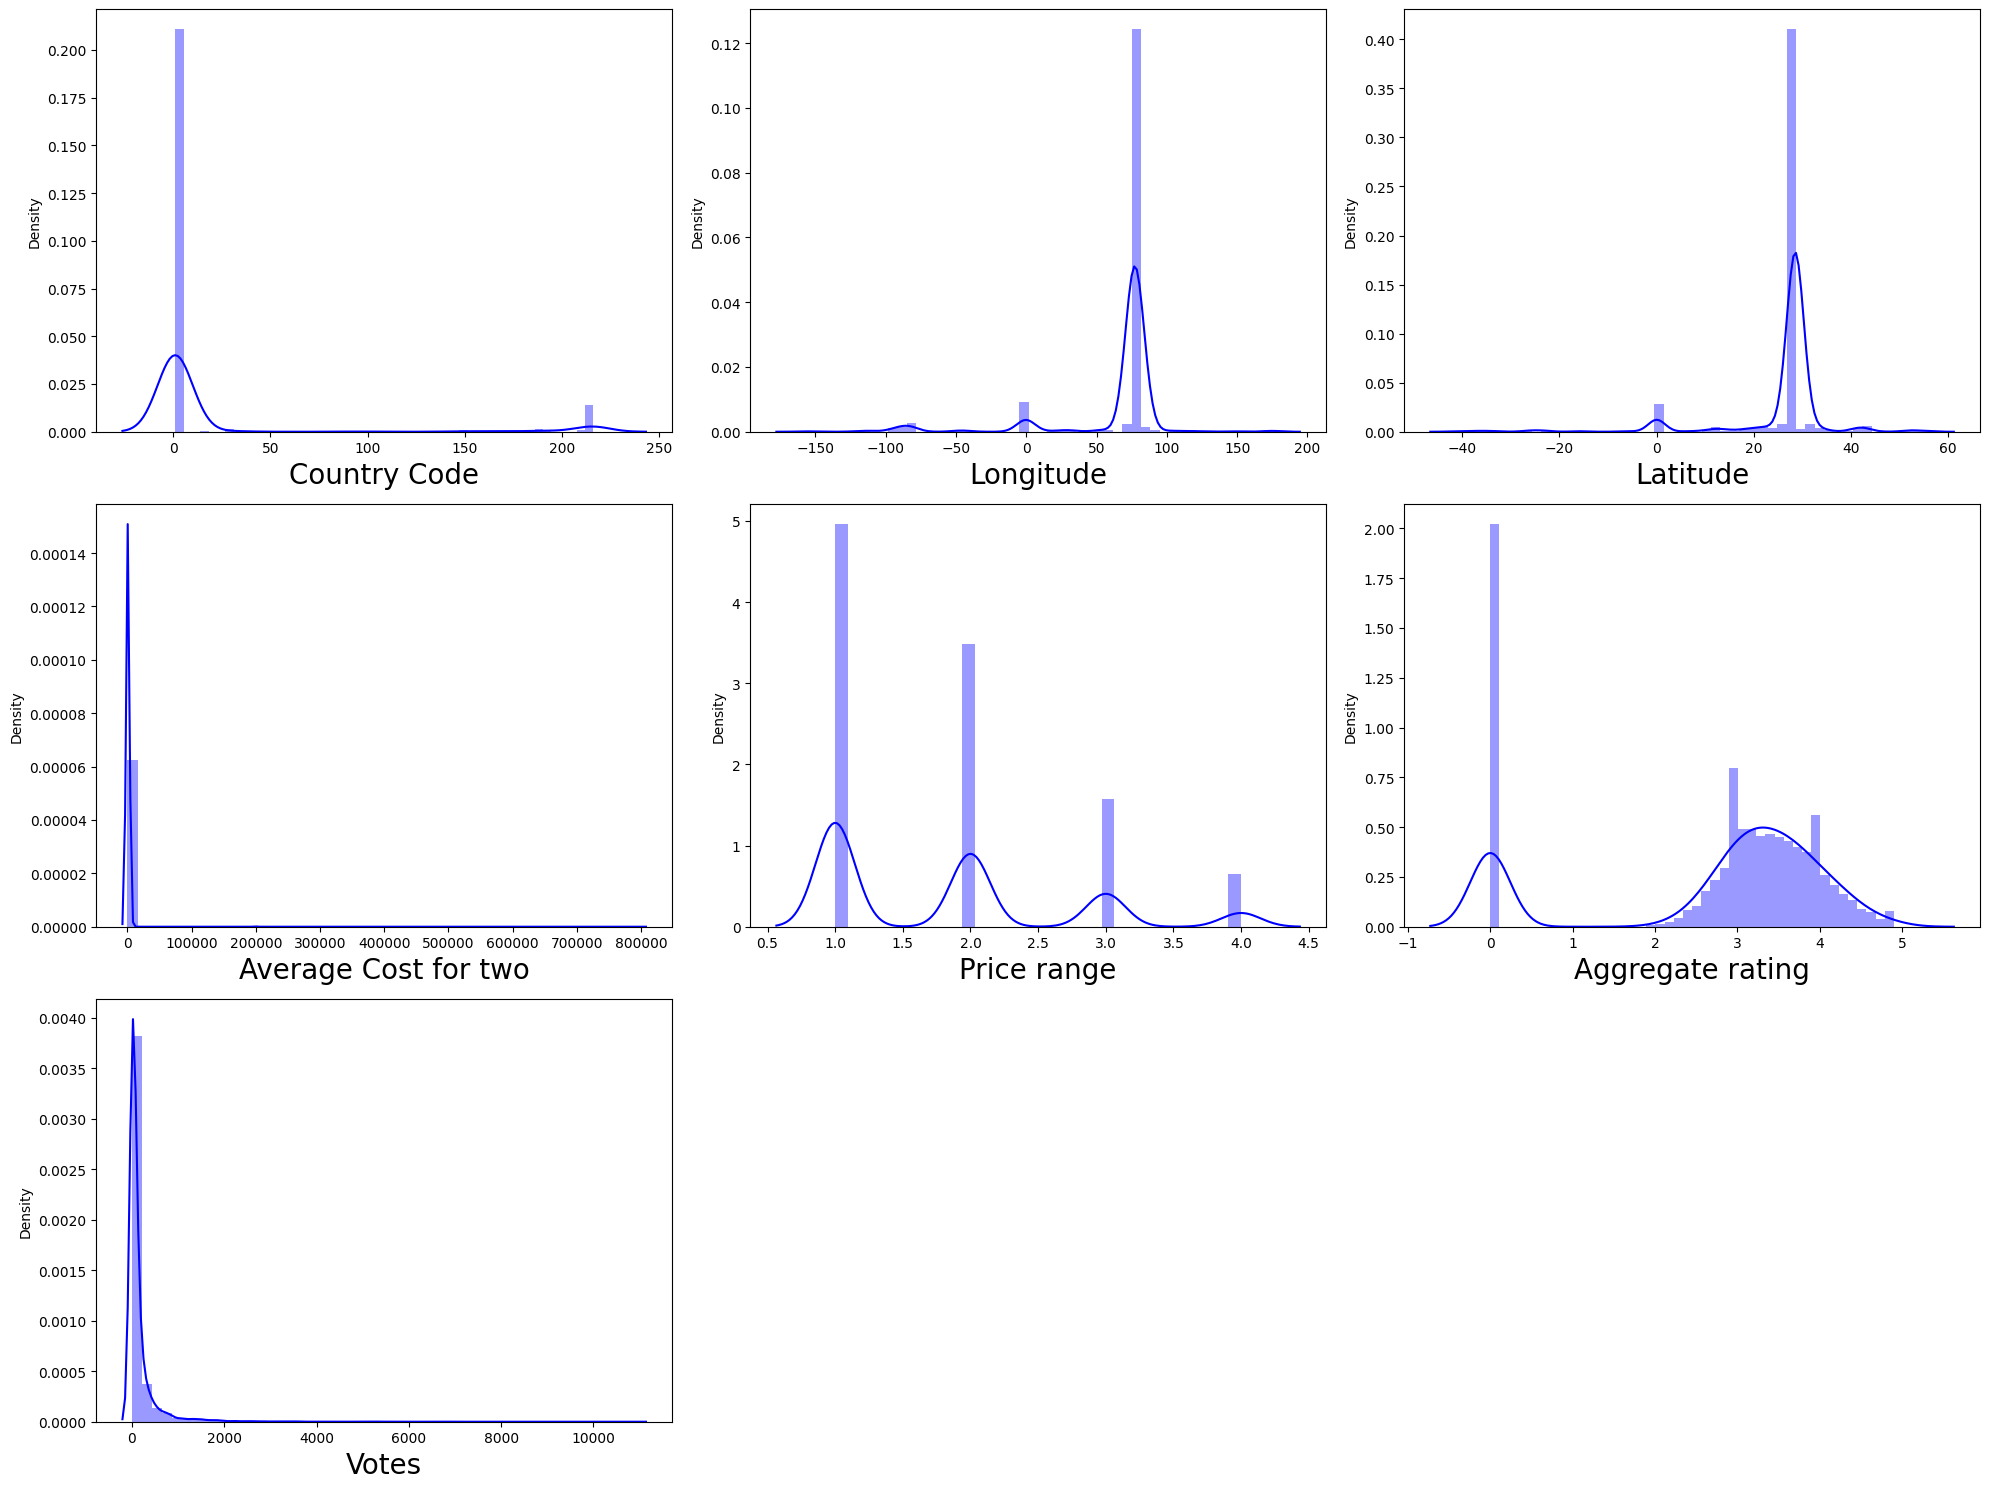

In [59]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()
plt.show()

We can see in above data distribution graph our data is not distributed .

And it has many skewness so we need to fix the skewness. 

### Encoding categorical data

In [66]:
Category=['Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text', 'Country']

In [67]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in Category:
    df[c] = le.fit_transform(df[c])
df.head()

,Country Code,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314,6
1,162,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591,6
2,162,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270,6
3,162,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365,6
4,162,121.057508,14.584450,1122,1500,0,1,0,0,4,4.8,0,1,229,6


### Outliers detection and removal

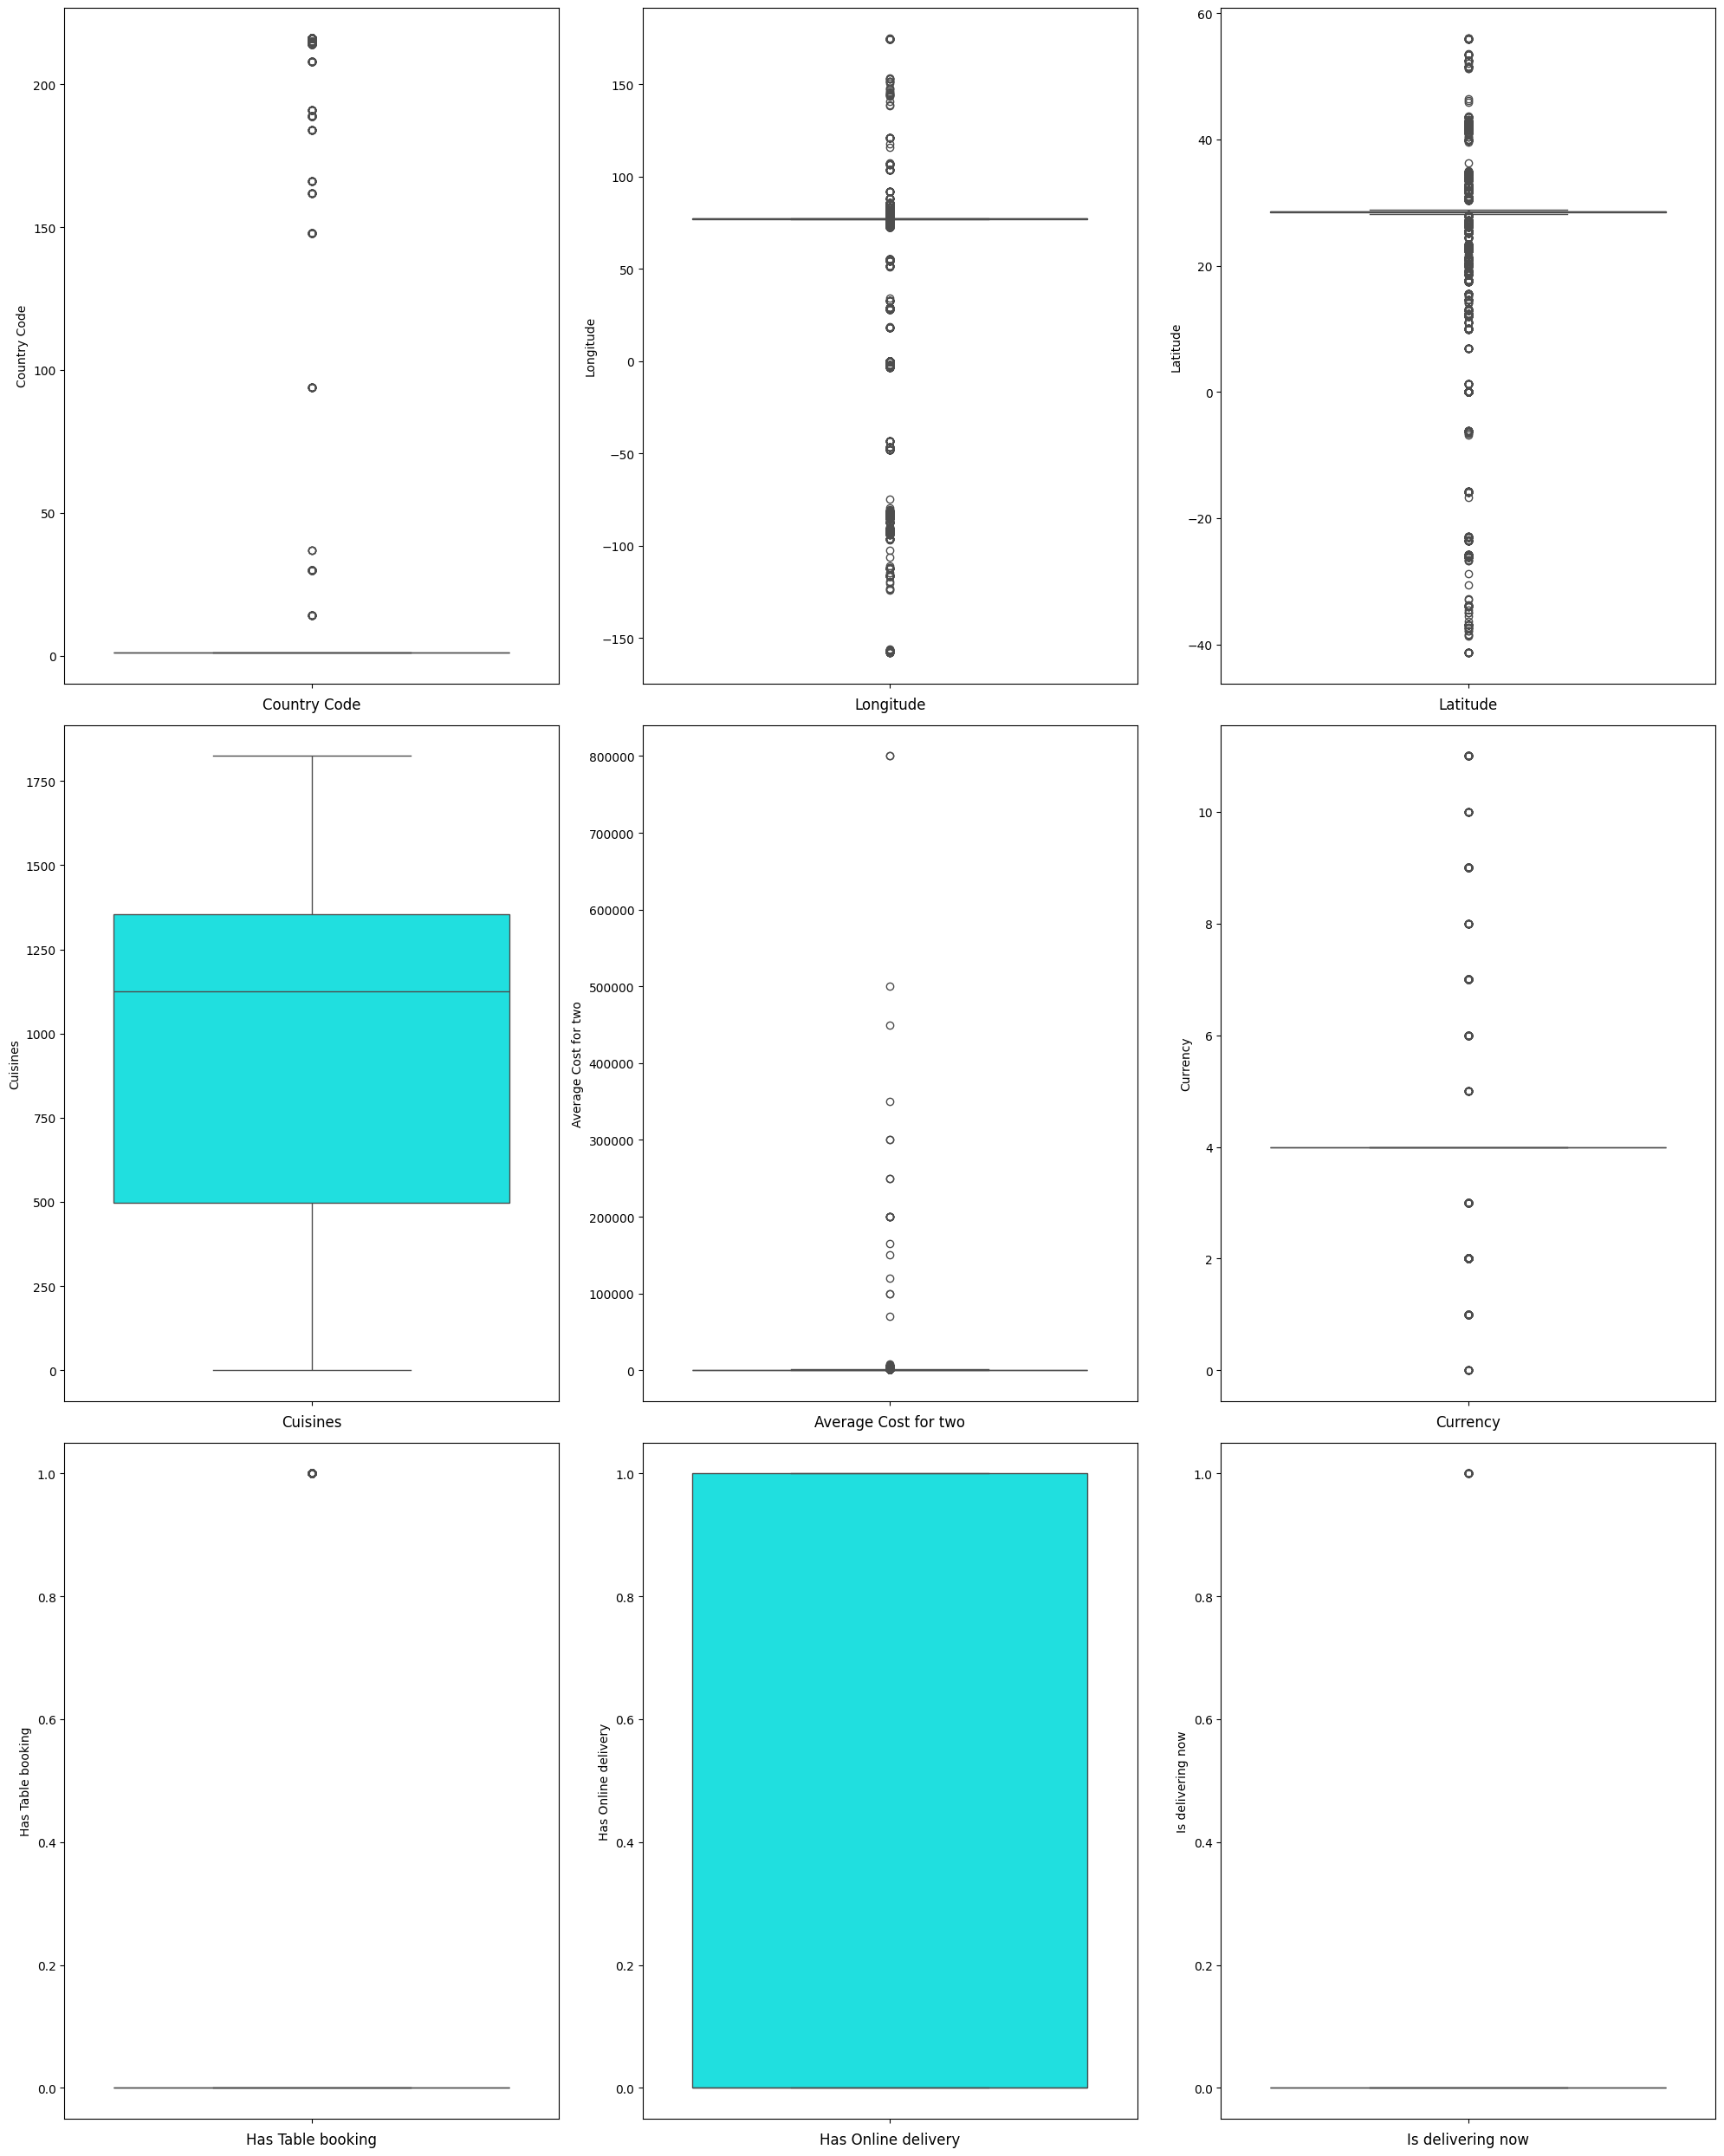

In [69]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for col in df.columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()
plt.show()

##### many columns having Outliers so we will fix if first

In [71]:
df2 = df.copy()

In [72]:
df2

,Country Code,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314,6
1,162,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591,6
2,162,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270,6
3,162,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365,6
4,162,121.057508,14.584450,1122,1500,0,1,0,0,4,4.8,0,1,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,208,28.977392,41.022793,1813,80,11,0,0,0,3,4.1,1,5,788,11
9538,208,29.041297,41.009847,1824,105,11,0,0,0,3,4.2,1,5,1034,11
9539,208,29.034640,41.055817,1110,170,11,0,0,0,4,3.7,5,2,661,11
9540,208,29.036019,41.057979,1657,120,11,0,0,0,4,4.0,1,5,901,11


In [73]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

Country Code               0.000000
Longitude                235.271852
Latitude                  70.007774
Cuisines                1520.000000
Average Cost for two    1000.000000
Currency                   4.000000
Has Table booking          0.000000
Has Online delivery        1.000000
Is delivering now          0.000000
Price range                2.000000
Aggregate rating           3.900000
Rating color               5.000000
Rating text                3.000000
Votes                    245.000000
Country                    3.000000
dtype: float64


In [74]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(7255, 15)


In [77]:
df.corr()

,Country Code,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Country Code,1.000000,-0.694629,0.018049,-0.135727,0.043717,-0.026571,-0.060815,-0.153581,-0.018199,0.245363,0.281295,-0.188500,0.224510,0.154361,0.968367
Longitude,-0.694629,1.000000,0.045415,0.129325,0.045948,0.332637,0.099860,0.177922,0.018703,-0.080257,-0.114733,0.060153,-0.183417,-0.084371,-0.763055
Latitude,0.018049,0.045415,1.000000,0.037841,-0.111080,-0.100965,0.054874,0.119087,0.015037,-0.166735,0.000197,0.042406,-0.129332,-0.022914,0.180572
Cuisines,-0.135727,0.129325,0.037841,1.000000,0.005875,0.070336,0.050867,-0.016303,0.007809,-0.005265,-0.080832,-0.016261,-0.079944,-0.032935,-0.131155
Average Cost for two,0.043717,0.045948,-0.111080,0.005875,1.000000,0.045566,0.007733,-0.019017,-0.001866,0.075111,0.051864,-0.050005,0.031440,0.067833,-0.003793
Currency,-0.026571,0.332637,-0.100965,0.070336,0.045566,1.000000,-0.000118,0.005806,0.001339,0.075073,-0.005337,-0.040485,0.014355,-0.026488,-0.098312
Has Table booking,-0.060815,0.099860,0.054874,0.050867,0.007733,-0.000118,1.000000,0.101041,-0.016838,0.502166,0.190351,-0.021371,0.044014,0.169619,-0.061157
Has Online delivery,-0.153581,0.177922,0.119087,-0.016303,-0.019017,0.005806,0.101041,1.000000,0.101713,0.077887,0.226250,0.011505,-0.081057,0.074532,-0.139329
Is delivering now,-0.018199,0.018703,0.015037,0.007809,-0.001866,0.001339,-0.016838,0.101713,1.000000,0.010937,0.019231,0.001889,-0.031989,-0.001105,-0.016506
Price range,0.245363,-0.080257,-0.166735,-0.005265,0.075111,0.075073,0.502166,0.077887,0.010937,1.000000,0.438356,-0.140953,0.163778,0.309474,0.179961


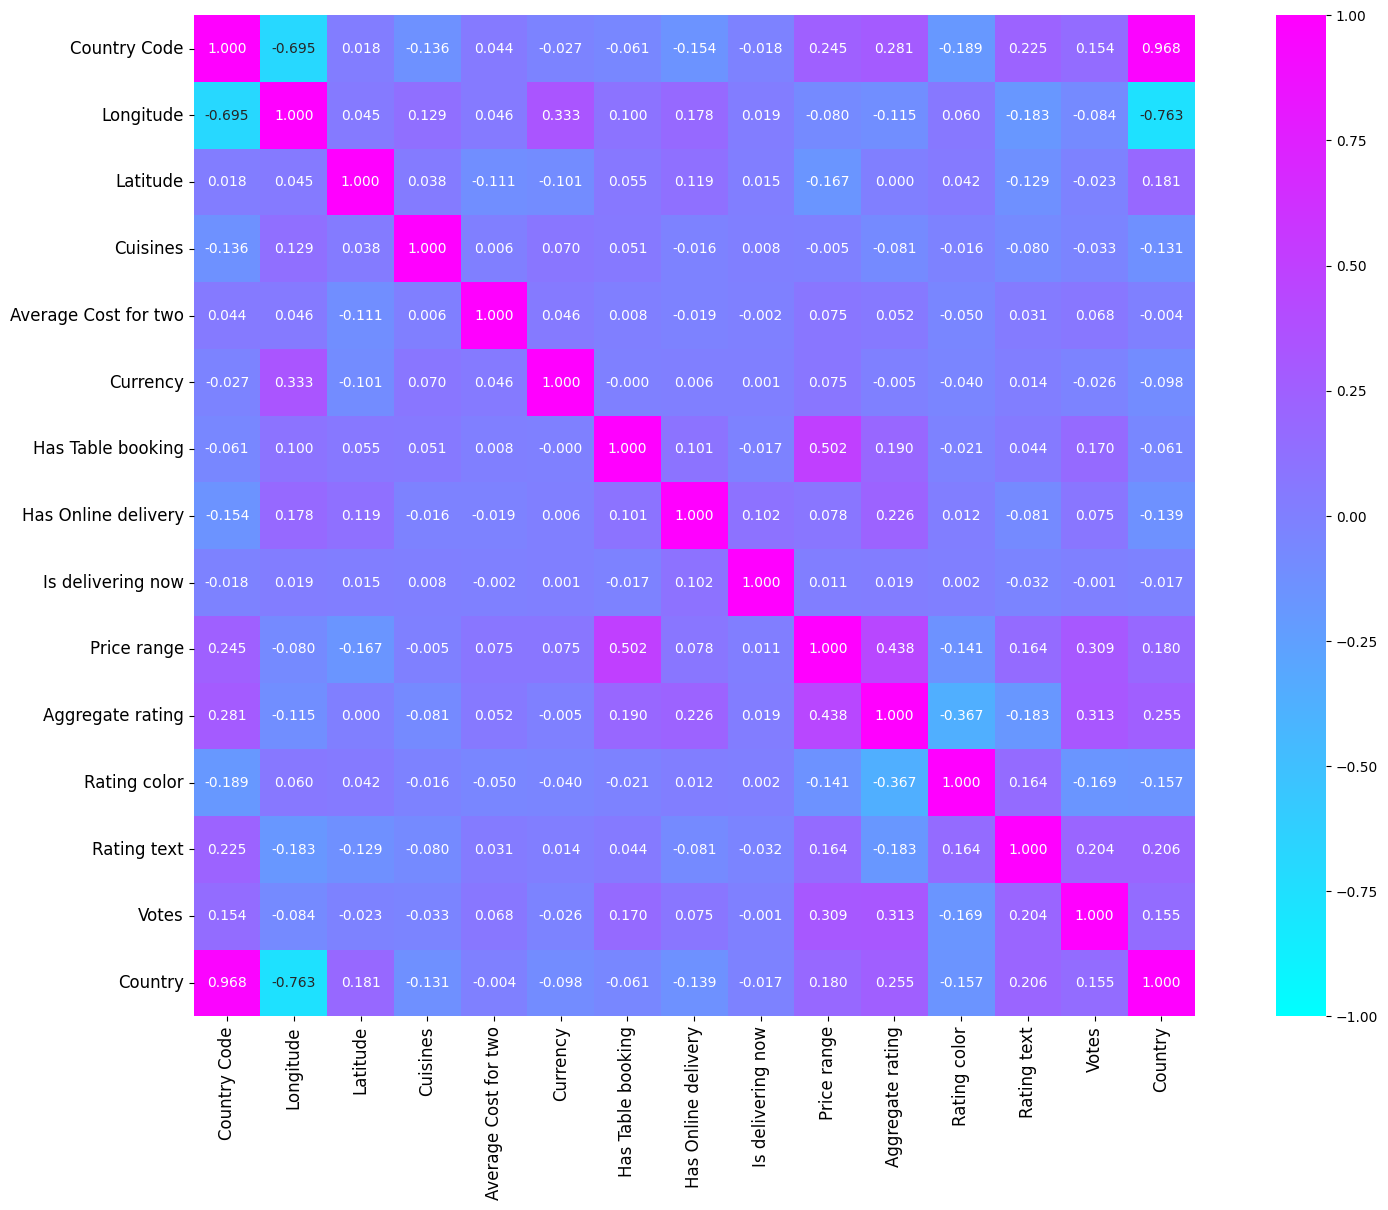

In [78]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [79]:
df.skew()

Country Code             3.064922
Longitude               -2.819828
Latitude                -3.081780
Cuisines                -0.305923
Average Cost for two    35.461264
Currency                 2.879234
Has Table booking        2.319457
Has Online delivery      1.113168
Is delivering now       16.665472
Price range              0.889879
Aggregate rating        -0.953052
Rating color             0.046227
Rating text              0.430970
Votes                    8.813270
Country                  3.337828
dtype: float64

In [80]:
skew = ['Country Code','Longitude','Latitude','Currency','Has Table booking','Has Online delivery','Is delivering now','Votes', 'Country']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [81]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,Country Code,Longitude,Latitude,Currency,Has Table booking,Has Online delivery,Is delivering now,Votes,Country
0,3.118882,2.505220,-1.602424,-6.337411,2.690738,-0.58792,-0.059799,1.192576,1.565493
1,3.118882,2.504490,-1.603641,-6.337411,2.690738,-0.58792,-0.059799,1.508337,1.565493
2,3.118882,2.506811,-1.600767,-6.337411,2.690738,-0.58792,-0.059799,1.117484,1.565493
3,3.118882,2.506791,-1.600361,-6.337411,-0.371645,-0.58792,-0.059799,1.267551,1.565493
4,3.118882,2.506848,-1.600451,-6.337411,2.690738,-0.58792,-0.059799,1.035702,1.565493


In [82]:
# checking skewness after using yeo-johnson
df.skew()

Country Code             2.797628
Longitude               -0.795561
Latitude                -0.293843
Cuisines                -0.305923
Average Cost for two    35.461264
Currency                 0.450551
Has Table booking        2.319457
Has Online delivery      1.113168
Is delivering now       16.665472
Price range              0.889879
Aggregate rating        -0.953052
Rating color             0.046227
Rating text              0.430970
Votes                   -0.003932
Country                 -1.344228
dtype: float64

In [83]:
# We will drop other Is Delivering now as result of poor correlation
data.drop("Is delivering now",axis=1,inplace=True)

## Machine Learning Model Building Classification

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

### Standard Scaling

In [85]:
# Splitting data in target and dependent feature
X = data.drop(['Price range'], axis =1)
Y = data['Price range']

In [86]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=100, test_size=.2)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (5804, 13)
Training target vector size: (5804,)
Test feature matrix size: (1451, 13)
Test target vector size: (1451,)


### Finding best Random state

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9788700045934773 on Random_state 438


### Logistics Regression Model

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=438, test_size=.2)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9772570640937285


Confusion matrix of Logistics Regression : 
 [[846   1   0   0]
 [  7 502   5   0]
 [  0  13  56   4]
 [  0   0   3  14]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00       847
           2       0.97      0.98      0.97       514
           3       0.88      0.77      0.82        73
           4       0.78      0.82      0.80        17

    accuracy                           0.98      1451
   macro avg       0.90      0.89      0.90      1451
weighted avg       0.98      0.98      0.98      1451



### Decision Tree Classifier

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=438, test_size=.2)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.9875947622329428


Confusion matrix of DecisionTreeClassifier : 
 [[845   2   0   0]
 [  1 511   2   0]
 [  0   8  62   3]
 [  0   0   2  15]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       847
           2       0.98      0.99      0.99       514
           3       0.94      0.85      0.89        73
           4       0.83      0.88      0.86        17

    accuracy                           0.99      1451
   macro avg       0.94      0.93      0.93      1451
weighted avg       0.99      0.99      0.99      1451



### Random Forest Classifier

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=438, test_size=.2)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.9848380427291523


Confusion matrix of RandomForestClassifier : 
 [[845   2   0   0]
 [  1 512   1   0]
 [  0   6  64   3]
 [  0   0   9   8]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       847
           2       0.98      1.00      0.99       514
           3       0.86      0.88      0.87        73
           4       0.73      0.47      0.57        17

    accuracy                           0.98      1451
   macro avg       0.89      0.84      0.86      1451
weighted avg       0.98      0.98      0.98      1451



### ExtraTreesClassifier()

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=438, test_size=.2)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.9772570640937285


Confusion matrix of ExtraTreesClassifier : 
 [[838   9   0   0]
 [  1 509   4   0]
 [  0  10  60   3]
 [  0   0   6  11]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           1       1.00      0.99      0.99       847
           2       0.96      0.99      0.98       514
           3       0.86      0.82      0.84        73
           4       0.79      0.65      0.71        17

    accuracy                           0.98      1451
   macro avg       0.90      0.86      0.88      1451
weighted avg       0.98      0.98      0.98      1451



### Crossvalidation

In [93]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =6)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.93801653 0.9611249  0.97849462 0.97932175 0.98180314 0.96029777]
Mean Score : 0.9665097854247414
Std deviation : 0.01539004836505626




Cross Validation Score DecisionTreeClassifier() :

Score : [0.94876033 0.96443342 0.97849462 0.99421009 0.99669148 0.93217535]
Mean Score : 0.9691275488929447
Std deviation : 0.023377231413797415




Cross Validation Score RandomForestClassifier() :

Score : [0.94793388 0.96443342 0.98511166 0.99090157 0.99007444 0.9693962 ]
Mean Score : 0.9746418618852637
Std deviation : 0.01558420597594385




Cross Validation Score ExtraTreesClassifier() :

Score : [0.92479339 0.96029777 0.97270471 0.98759305 0.97601323 0.95698925]
Mean Score : 0.9630652338863482
Std deviation : 0.019880873584068422




##### We can see that DecisionTreeClassifier gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Decision tree model and Used it as final model.

### Hyper Parameter Tuning : GridSearchCV

In [94]:
from sklearn.model_selection import GridSearchCV

In [99]:
parameter = { 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              }

In [100]:
GCV = GridSearchCV(DecisionTreeClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2;, score=0.829 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2;, score=0.939 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2;, score=0.842 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2;, score=0.961 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2;, score=0.761 total time=   0.0s
[CV 1/5] END crite

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2']},
             verbose=5)

In [101]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2'}

### Final Classification Model

In [102]:
Final_mod = RandomForestClassifier(criterion='entropy', max_depth=10 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.980013783597519


In [103]:
from sklearn.metrics import roc_auc_score

#### Saving Model

In [104]:
import joblib
joblib.dump(Final_mod,'Price_range_classification_Final.pkl')

['Price_range_classification_Final.pkl']

## Machine Learning Model Building Regression

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

#### Feature Engineering before proceeding

In [106]:
df2=df.copy()

In [107]:
df3=df2.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

Country Code               0.000000
Longitude                  3.040473
Latitude                   3.017307
Cuisines                1520.000000
Average Cost for two    1000.000000
Currency                   6.407399
Has Table booking          0.000000
Has Online delivery        2.288833
Is delivering now          0.000000
Price range                2.000000
Aggregate rating           3.900000
Rating color               5.000000
Rating text                3.000000
Votes                      2.692397
Country                   10.059790
dtype: float64


In [108]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(7482, 15)


In [109]:
skew = ['Longitude','Latitude','Cuisines','Currency','Has Online delivery','Price range','Aggregate rating','Rating color', 'Rating text', 'Votes', 'Country']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,Longitude,Latitude,Cuisines,Currency,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
615,0.394161,-0.988380,0.986885,-1.387779e-17,-0.596389,1.589145,1.066972,1.376945,0.489864,1.069110,0.0
616,-2.774608,-2.374853,0.986885,-1.387779e-17,-0.596389,1.033529,0.727951,1.376945,0.489864,0.734890,0.0
617,0.394183,-0.988858,0.595116,-1.387779e-17,-0.596389,1.033529,0.811371,1.376945,0.489864,0.873294,0.0
618,0.389384,-0.968428,1.231710,-1.387779e-17,-0.596389,1.033529,1.153922,-1.617758,1.573928,0.835163,0.0
619,0.392743,-0.965013,0.721745,-1.387779e-17,-0.596389,1.589145,1.330391,-1.617758,1.573928,1.184010,0.0


In [110]:
data.drop("Currency",axis=1,inplace=True)

### Standard Scaling

In [111]:
# Splitting data in target and dependent feature
X = data.drop(['Average Cost for two'], axis =1)
Y = data['Average Cost for two']

In [112]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=545, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (5237, 13)
Training target vector size: (5237,)
Test feature matrix size: (2245, 13)
Test target vector size: (2245,)


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.3)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.6703685056564381 on Random_state 698


### Linear Regression

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=698, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [766.44466847 653.64844267 694.08458578 ... 693.85273225 263.43569081
 754.38020565]


Actual Wins:
 4652     700
3885     500
4877     600
7271     300
3748     900
        ... 
3203     600
4045     200
3475     500
2004     150
2064    1250
Name: Average Cost for two, Length: 2245, dtype: int64


In [116]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 123.67156390852826
Mean squared error : 29853.455913851158
Root Mean Squared Error: 172.78152654103724


 R2 Score :
0.6703685056564382


### Applying other ML Models

In [117]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 82.78133517080815
Mean squared error : 12380.131433152315
Root Mean Squared Error: 111.26603899282259


 R2 Score :
0.8633028874025173


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 123.67144512180089
Mean squared error : 29853.447392935945
Root Mean Squared Error: 172.7815018829734


 R2 Score :
0.6703685997414253


 Error of  DecisionTreeRegressor() :
Mean absolute error : 105.28139251246155
Mean squared error : 23305.5680407835
Root Mean Squared Error: 152.6616128592368


 R2 Score :
0.7426680099624688


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 98.10578822858042
Mean squared error : 16346.591838183083
Root Mean Squared Error: 127.85379086356056


 R2 Score :
0.8195066088631796


 Error of  GradientBoostingRegressor() :
Mean absolute error : 85.47460070702472
Mean squared error : 12912.98434772526
Root Mean Squared Error: 113.63531294331555


 R2 Score :
0.8574193105394945


 Error of 

In [118]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.8459345545920133


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.6229505986441815


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.7244552602653154


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.8186251827599429


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.8428027455145332


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_de

##### Among all Model RandomForestRegressor() gave us maximum R2 score and minimum RMSE value . So We will perform Hyper Parameter Tuning on Random Forest Regressor.¶

In [119]:
from sklearn.model_selection import GridSearchCV

In [129]:
parameter= {
    'n_estimators': [50, 60, 80],
    'max_depth': [10, 20, 40],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [5, 10, 15, 20],
    'max_features': ["auto", "sqrt", "log2"]
}

In [130]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose = 5)

In [131]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=nan total time=   0.0

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [50, 60, 80]},
             verbose=5)

In [132]:
GCV.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

### Final Regression Model

In [133]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=20 , max_depth= 20, max_features = 'log2',
             min_samples_leaf = 5, min_samples_split = 5)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 90.33084046324858
Mean squared error : 14451.651553209696
Root Mean Squared Error: 120.21502216116626


 R2 Score of Final Model :
0.8404298815197895




### Final Regression Saving Model¶

In [134]:
import joblib
joblib.dump(Final_mod,'Average_Cost_for_two_regression_Final.pkl')

['Average_Cost_for_two_regression_Final.pkl']